## Notice
gstatsMCMC.Topography provides functions for loading required datasets, such as the MEaSUREs InSAR-Based Antarctica Ice Velocity Map (Ver 2), Surface Mass Balance provided by RACMO2.3p2, MEaSUREs ITS_LIVE Antarctic Grounded Ice Sheet Elevation Change (Ver 1), and BedMachine Antarctica Topography. These functions are used for conveniently loading datasets used in the paper __DOI__. However, they are not generally applicable to other datasets or the above datasets if they changed their format after 2025. This jupyter notebook tutorial demonstrate how to load those dataset through functions in the gstatsMCMC library. The original code in gstatsMCMC also could be a good starting point to be used for other dataset

# Tutorial 1: Loading and Visualizing Ice Stream Data

Let's first import libraries used in this jupyter lab. Notice that prerequired libraries in gstatsMCMC must be installed even if they are not imported in the jupyter notebook interface here

__TODO: change the name of the Topography module, or update the package's structure__

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Topography

First, lets decides a region in Antarctic that we are interested in

__Q1: Where is your glacier? What is the boundary of this glacier in polar stereographic coordinate? Answer the question and then fill out the code__

Answer: Denman Glacier

In [3]:
# unit is meter
xmin = 2300000
xmax = 2600000
ymax = -300000
ymin = -500000

In [4]:
resolution = 1000

### First, lets load the ice-penetrating radar data.
Please check with bedmap3 website and __download all the bed elevation measurements data into one folder__. Let's call that folder *radar_folder*.

In [5]:
radar_folder = '../Data/radarTest'
output_file_name = '../Data/compiledRadar.csv'

Loading radar dataset

In [6]:
df, df_out, fig = Topography.load_radar(radar_folder, output_file_name, include_only_thickness_data=False)

the following files are loaded: 
['.ipynb_checkpoints', 'UTIG_2015_EAGLE_AIR_BM3.csv', 'UTIG_2010_ICECAP_AIR_BM3.csv', 'NASA_2019_ICEBRIDGE_AIR_BM3.csv', 'radar_metadata.txt']
the metadata for each radar compaign is saved in  ../Data/radarTest/radar_metadata.txt
There are in total 6774053 datapoints
output csv file saved as  ../Data/compiledRadar.csv


In [7]:
df

,surface_altitude (m),bed,file,x,y
0,941.46,-6.85,UTIG_2015_EAGLE_AIR_BM3.csv,2.430675e+06,-7.553640e+05
1,942.28,-20.10,UTIG_2015_EAGLE_AIR_BM3.csv,2.430673e+06,-7.553431e+05
2,943.07,-19.73,UTIG_2015_EAGLE_AIR_BM3.csv,2.430672e+06,-7.553221e+05
3,943.85,-20.41,UTIG_2015_EAGLE_AIR_BM3.csv,2.430670e+06,-7.553011e+05
4,944.59,-28.01,UTIG_2015_EAGLE_AIR_BM3.csv,2.430669e+06,-7.552801e+05
...,...,...,...,...,...
6774048,1177.04,-490.83,NASA_2019_ICEBRIDGE_AIR_BM3.csv,9.573014e+05,-2.032978e+06
6774049,1178.06,-485.31,NASA_2019_ICEBRIDGE_AIR_BM3.csv,9.573079e+05,-2.032991e+06
6774050,1178.05,-481.17,NASA_2019_ICEBRIDGE_AIR_BM3.csv,9.573144e+05,-2.033005e+06
6774051,1176.71,-478.78,NASA_2019_ICEBRIDGE_AIR_BM3.csv,9.573208e+05,-2.033018e+06


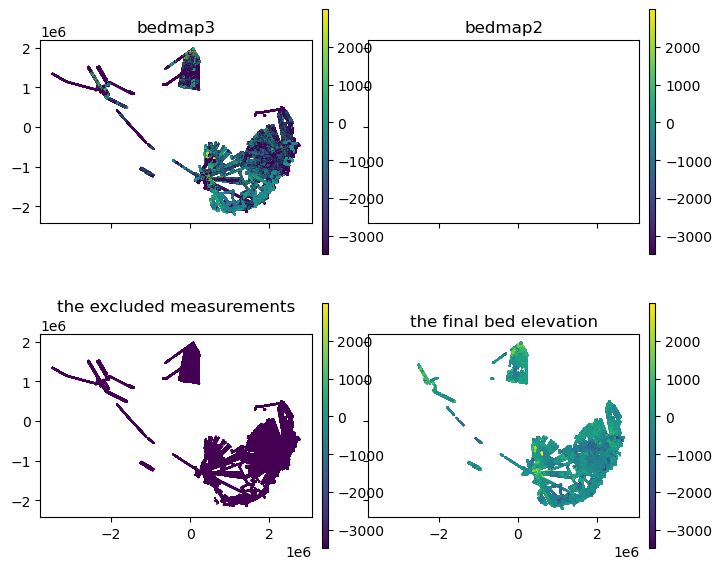

In [8]:
fig

gridding radar data

In [11]:
df=df[(df['x']>=xmin) & (df['x']<=xmax) & (df['y']>=ymin) & (df['y']<=ymax)] # find all radar data inside the domain
df_grid, grid_matrix, rows, cols = Topography.grid_data(df, 'x', 'y', 'bed', resolution, xmin, xmax, ymin, ymax) # grid them
df_grid = df_grid.rename(columns = {"Z": "bed"})

x_uniq = np.unique(df_grid.X)
y_uniq = np.unique(df_grid.Y)

xx, yy = np.meshgrid(x_uniq, y_uniq) # xx store the x coordinate of every location on this 2D map. Similarly, yy store y coordinate
xx.shape

(200, 300)

In [14]:
df_grid

,X,Y,Sum,Count,bed
0,2300000.0,-500000.0,0.00,0.0,NaN
1,2301000.0,-500000.0,0.00,0.0,NaN
2,2302000.0,-500000.0,0.00,0.0,NaN
3,2303000.0,-500000.0,0.00,0.0,NaN
4,2304000.0,-500000.0,0.00,0.0,NaN
...,...,...,...,...,...
59995,2595000.0,-301000.0,0.00,0.0,NaN
59996,2596000.0,-301000.0,0.00,0.0,NaN
59997,2597000.0,-301000.0,-19153.21,55.0,-348.240182
59998,2598000.0,-301000.0,-1377.57,4.0,-344.392500


In [13]:
grid_matrix

array([[          nan,           nan,           nan, ..., -348.24018182,
        -344.3925    ,           nan],
       [          nan,           nan,           nan, ..., -354.6928    ,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

save the gridded radar data

In [ ]:
df_grid.to_csv('compiledRadar.csv', index = False)

now your turn, how could you load compiled radar data from the output file?

In [ ]:
df_grid = pd.read_csv('compiledRadar.csv')

### Then we can load other data needed

Please refers to the document of the library to findout what to fill in each argument of the method. If you encounter any question or need clarification, please contact your TA

In [ ]:
print('testing for loading InSAR_MEaSUREs velocity dataset')
velx, vely, velxerr, velyerr, figvel = Topography.load_vel_measures('../../Data/antarctica_ice_velocity_450m_v2.nc', xx, yy)
figvel

In [ ]:
print('testing for loading height change rate dataset')
dhdt, figdhdt = Topography.load_dhdt('../Data/ANT_G1920_GroundedIceHeight_v01.nc',xx,yy,interp_method='linear',begin_year=2013,end_year=2015,month=7)
figdhdt

In [ ]:
print('testing for loading racmo dataset')   
smb, fig = Topography.load_smb_racmo('../Data/SMB_RACMO2.3p2_yearly_ANT27_1979_2016.nc', xx, yy, interp_method='spline',time=2014)
figsmb

In [ ]:
print('testing for loading BedMachine dataset')
bm_mask, bm_source, bm_bed, bm_surface, bm_errbed, figbm = Topography.load_bedmachine('../../Data/BedMachineAntarctica-v3.nc', xx, yy)
figbm

__How will you interpret the data loaded?__

__Have you noticed any data that have gaps inside the region? Do you have any guesses why those gaps exists?__

These gaps could affect the calculation of mass conservation residual in the later tutorial. If the gaps exist, please try to load data from other datasets or consistently change the reference time, until you have found surface ice velocity, surface mass balance, and surface elevation change that covers the entire region